In [1]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [2]:
county_facts = "county_facts.csv"
primary_results = "primary_results.csv"

In [3]:
county_facts_df = pd.read_csv(county_facts, encoding="ISO-8859-1")
primary_results_df = pd.read_csv(primary_results, encoding="ISO-8859-1")

In [4]:
# County facts dataframe
county_facts_df.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [5]:
# Remove all NaN
county_facts_df = county_facts_df.dropna(how='any')

# Set dataframe to show specific columns
county_facts_cleaned_df = county_facts_df[["fips", "area_name", "POP010210", "POP645213",  
                                    "INC110213", "PVY020213", "SBO315207", "SBO215207",
                                  "SBO415207", "SBO015207", "RTN131207", 
                                   "LND110210", "POP060210", "AGE135214", "AGE295214", "AGE775214", "SEX255214", "RHI125214",
                                          "RHI225214", "RHI425214", "RHI725214"]]
#county_facts_cleaned_df.count()

In [6]:
# Rename columns
county_facts_cleaned_df = county_facts_cleaned_df.rename(columns={"area_name":"County", 
                                                 
                                                  "POP010210":"2010 Population", 
                                                  "POP645213":"% Foreign Born", 
                                                  
                                                   
                                                  "INC110213":"Median Household Income", 
                                                  "PVY020213":"Below Poverty Level", 
                                                   
                                                  "SBO315207":"% Black-owned Firms", 
                                                  "SBO215207":"% Asian-owned Firms",
                                                  "SBO415207":"% Hispanic-owned Firms", 
                                                  "SBO015207":"% Women-owned Firms", 
                                                   
                                                  
                                                  "RTN131207":"Retail Sales per Capita",
                                                 
                                                  "LND110210":"Land Area (Square Miles)", 
                                                  "POP060210":"Population per Square Mile",
                                                  "AGE135214":"% Person under 5 years",
                                                  "AGE295214": "% Persons under 18 years",
                                                  "AGE775214": "% Persons 65 and older",
                                                  "SEX255214": "% Female Persons", 
                                                  "RHI125214": "% White", 
                                                  "RHI225214": "% Black African", 
                                                  "RHI425214": "% Asian",
                                                  "RHI725214": "% Hispanic",         
                                                                                   })
county_facts_cleaned_df.head()

,fips,County,2010 Population,% Foreign Born,Median Household Income,Below Poverty Level,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,...,Land Area (Square Miles),Population per Square Mile,% Person under 5 years,% Persons under 18 years,% Persons 65 and older,% Female Persons,% White,% Black African,% Asian,% Hispanic
2,1001,Autauga County,54571,1.6,53682,12.1,15.2,1.3,0.7,31.7,...,594.44,91.8,6.0,25.2,13.8,51.4,77.9,18.7,1.1,2.7
3,1003,Baldwin County,182265,3.6,50221,13.9,2.7,1.0,1.3,27.3,...,1589.78,114.6,5.6,22.2,18.7,51.2,87.1,9.6,0.9,4.6
4,1005,Barbour County,27457,2.9,32911,26.7,0.0,0.0,0.0,27.0,...,884.88,31.0,5.7,21.2,16.5,46.6,50.2,47.6,0.5,4.5
5,1007,Bibb County,22915,1.2,36447,18.1,14.9,0.0,0.0,0.0,...,622.58,36.8,5.3,21.0,14.8,45.9,76.3,22.1,0.2,2.1
6,1009,Blount County,57322,4.3,44145,15.8,0.0,0.0,0.0,23.2,...,644.78,88.9,6.1,23.6,17.0,50.5,96.0,1.8,0.3,8.7


In [7]:
primary_results_df = primary_results_df.dropna(how='any')

In [8]:
# Set dataframe to show specific columns
primary_results_cleaned_df = primary_results_df[["fips", "party", "candidate", "votes", "fraction_votes"]]


In [9]:
# Rename columns
primary_results_cleaned_df = primary_results_cleaned_df.rename(columns={"party":"Party",
                                                                       "candidate":"Candidate",
                                                                       "votes":"Votes",})

In [10]:
len(primary_results_cleaned_df)

24511

In [11]:
primary_results_cleaned_df.head()

,fips,Party,Candidate,Votes,fraction_votes
0,1001.0,Democrat,Bernie Sanders,544,0.182
1,1001.0,Democrat,Hillary Clinton,2387,0.800
2,1003.0,Democrat,Bernie Sanders,2694,0.329
3,1003.0,Democrat,Hillary Clinton,5290,0.647
4,1005.0,Democrat,Bernie Sanders,222,0.078


In [12]:
aaa = primary_results_cleaned_df.set_index('fips')
aaa.head()


,Party,Candidate,Votes,fraction_votes
fips,,,,
1001.0,Democrat,Bernie Sanders,544,0.182
1001.0,Democrat,Hillary Clinton,2387,0.800
1003.0,Democrat,Bernie Sanders,2694,0.329
1003.0,Democrat,Hillary Clinton,5290,0.647
1005.0,Democrat,Bernie Sanders,222,0.078


In [13]:
aaaa = pd.pivot_table(aaa, values= ["Votes", "Party"], index=['fips'], columns=["Candidate"], fill_value=0)
aaaa.head()

Votes                                                       \
Candidate  No Preference  Uncommitted Ben Carson Bernie Sanders Carly Fiorina   
fips                                                                            
1001.0                 0            0       1764            544             0   
1003.0                 0            0       4221           2694             0   
1005.0                 0            0        417            222             0   
1007.0                 0            0        393            246             0   
1009.0                 0            0       1523            395             0   

                                                                            \
Candidate Chris Christie Donald Trump Hillary Clinton Jeb Bush John Kasich   
fips                                                                         
1001.0                 0         5387            2387        0         421   
1003.0                 0        23618            5290        0        2987   
1005.0                 0         1710            2567        0         123   
1007.0                 0         1959             942        0          84   
1009.0                 0         7390             564        0         337   

                                                                             \
Candidate Marco Rubio Martin O'Malley Mike Huckabee Rand Paul Rick Santorum   
fips                                                                          
1001.0           1785               0             0         0             0   
1003.0           9703               0             0         0             0   
1005.0            498               0             0         0             0   
1007.0            444               0             0         0             0   
1009.0           1843               0             0         0             0   

                    
Candidate Ted Cruz  
fips                
1001.0        2482  
1003.0        8571  
1005.0         609  
1007.0        1011  
1009.0        3698

In [14]:
len(aaaa)

4207

In [15]:
merge_02 = pd.merge(county_facts_cleaned_df, aaaa, left_on="fips", right_index=True)
merge_02.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,fips,County,2010 Population,% Foreign Born,Median Household Income,Below Poverty Level,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
2,1001,Autauga County,54571,1.6,53682,12.1,15.2,1.3,0.7,31.7,...,5387,2387,0,421,1785,0,0,0,0,2482
3,1003,Baldwin County,182265,3.6,50221,13.9,2.7,1.0,1.3,27.3,...,23618,5290,0,2987,9703,0,0,0,0,8571
4,1005,Barbour County,27457,2.9,32911,26.7,0.0,0.0,0.0,27.0,...,1710,2567,0,123,498,0,0,0,0,609
5,1007,Bibb County,22915,1.2,36447,18.1,14.9,0.0,0.0,0.0,...,1959,942,0,84,444,0,0,0,0,1011
6,1009,Blount County,57322,4.3,44145,15.8,0.0,0.0,0.0,23.2,...,7390,564,0,337,1843,0,0,0,0,3698


In [16]:
merge_02.columns

Index([                      'fips',                     'County',
                  '2010 Population',             '% Foreign Born',
          'Median Household Income',        'Below Poverty Level',
              '% Black-owned Firms',        '% Asian-owned Firms',
           '% Hispanic-owned Firms',        '% Women-owned Firms',
          'Retail Sales per Capita',   'Land Area (Square Miles)',
       'Population per Square Mile',     '% Person under 5 years',
         '% Persons under 18 years',     '% Persons 65 and older',
                 '% Female Persons',                    '% White',
                  '% Black African',                    '% Asian',
                       '% Hispanic',  ('Votes', ' No Preference'),
          ('Votes', ' Uncommitted'),      ('Votes', 'Ben Carson'),
        ('Votes', 'Bernie Sanders'),   ('Votes', 'Carly Fiorina'),
        ('Votes', 'Chris Christie'),    ('Votes', 'Donald Trump'),
       ('Votes', 'Hillary Clinton'),        ('Votes', 'Jeb Bus

In [17]:
final_clean = merge_02.drop(columns=['County'])
final_clean.head()

,fips,2010 Population,% Foreign Born,Median Household Income,Below Poverty Level,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,Retail Sales per Capita,...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
2,1001,54571,1.6,53682,12.1,15.2,1.3,0.7,31.7,12003,...,5387,2387,0,421,1785,0,0,0,0,2482
3,1003,182265,3.6,50221,13.9,2.7,1.0,1.3,27.3,17166,...,23618,5290,0,2987,9703,0,0,0,0,8571
4,1005,27457,2.9,32911,26.7,0.0,0.0,0.0,27.0,6334,...,1710,2567,0,123,498,0,0,0,0,609
5,1007,22915,1.2,36447,18.1,14.9,0.0,0.0,0.0,5804,...,1959,942,0,84,444,0,0,0,0,1011
6,1009,57322,4.3,44145,15.8,0.0,0.0,0.0,23.2,5622,...,7390,564,0,337,1843,0,0,0,0,3698


In [18]:
# Rename columns
merge_clean = final_clean.rename(columns={"('Votes', 'Donald Trump')":"Donald Trump"})
merge_clean.head()

,fips,2010 Population,% Foreign Born,Median Household Income,Below Poverty Level,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,Retail Sales per Capita,...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
2,1001,54571,1.6,53682,12.1,15.2,1.3,0.7,31.7,12003,...,5387,2387,0,421,1785,0,0,0,0,2482
3,1003,182265,3.6,50221,13.9,2.7,1.0,1.3,27.3,17166,...,23618,5290,0,2987,9703,0,0,0,0,8571
4,1005,27457,2.9,32911,26.7,0.0,0.0,0.0,27.0,6334,...,1710,2567,0,123,498,0,0,0,0,609
5,1007,22915,1.2,36447,18.1,14.9,0.0,0.0,0.0,5804,...,1959,942,0,84,444,0,0,0,0,1011
6,1009,57322,4.3,44145,15.8,0.0,0.0,0.0,23.2,5622,...,7390,564,0,337,1843,0,0,0,0,3698


In [19]:
merge_clean.columns

Index([                      'fips',            '2010 Population',
                   '% Foreign Born',    'Median Household Income',
              'Below Poverty Level',        '% Black-owned Firms',
              '% Asian-owned Firms',     '% Hispanic-owned Firms',
              '% Women-owned Firms',    'Retail Sales per Capita',
         'Land Area (Square Miles)', 'Population per Square Mile',
           '% Person under 5 years',   '% Persons under 18 years',
           '% Persons 65 and older',           '% Female Persons',
                          '% White',            '% Black African',
                          '% Asian',                 '% Hispanic',
        ('Votes', ' No Preference'),    ('Votes', ' Uncommitted'),
            ('Votes', 'Ben Carson'),  ('Votes', 'Bernie Sanders'),
         ('Votes', 'Carly Fiorina'),  ('Votes', 'Chris Christie'),
          ('Votes', 'Donald Trump'), ('Votes', 'Hillary Clinton'),
              ('Votes', 'Jeb Bush'),     ('Votes', 'John Kasic

In [20]:
clean = merge_clean.set_index('fips')
clean.head()

,2010 Population,% Foreign Born,Median Household Income,Below Poverty Level,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,Retail Sales per Capita,Land Area (Square Miles),...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
fips,,,,,,,,,,,,,,,,,,,,,
1001,54571,1.6,53682,12.1,15.2,1.3,0.7,31.7,12003,594.44,...,5387,2387,0,421,1785,0,0,0,0,2482
1003,182265,3.6,50221,13.9,2.7,1.0,1.3,27.3,17166,1589.78,...,23618,5290,0,2987,9703,0,0,0,0,8571
1005,27457,2.9,32911,26.7,0.0,0.0,0.0,27.0,6334,884.88,...,1710,2567,0,123,498,0,0,0,0,609
1007,22915,1.2,36447,18.1,14.9,0.0,0.0,0.0,5804,622.58,...,1959,942,0,84,444,0,0,0,0,1011
1009,57322,4.3,44145,15.8,0.0,0.0,0.0,23.2,5622,644.78,...,7390,564,0,337,1843,0,0,0,0,3698


In [21]:
clean.to_csv("nobetter2.csv", index=False, header=True)

In [22]:
clean.corr()

,2010 Population,% Foreign Born,Median Household Income,Below Poverty Level,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,Retail Sales per Capita,Land Area (Square Miles),...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
2010 Population,1.000000,0.485436,0.253549,-0.075149,0.171018,0.522068,0.286762,0.216259,0.164594,0.119566,...,0.838469,0.922451,0.034693,0.506288,0.421094,0.006741,0.003128,0.011937,0.001713,0.582407
% Foreign Born,0.485436,1.000000,0.356789,-0.060741,0.088996,0.537984,0.532459,0.178205,0.207123,0.156771,...,0.390376,0.456411,0.007880,0.206257,0.311507,0.008937,-0.004101,0.008282,0.003990,0.255750
Median Household Income,0.253549,0.356789,1.000000,-0.760644,-0.036855,0.383492,0.062747,0.209576,0.285573,0.016484,...,0.328803,0.225690,0.012973,0.267244,0.177531,0.044675,0.051488,0.053439,0.058205,0.263814
Below Poverty Level,-0.075149,-0.060741,-0.760644,1.000000,0.211907,-0.119778,0.108977,-0.012331,-0.189616,0.005481,...,-0.164401,-0.048342,-0.003238,-0.139341,-0.069557,-0.057973,-0.068961,-0.050316,-0.073504,-0.141694
% Black-owned Firms,0.171018,0.088996,-0.036855,0.211907,1.000000,0.186990,0.035575,0.246715,0.040263,-0.086565,...,0.133692,0.241758,0.085124,0.108885,0.180644,-0.019228,-0.027393,-0.018210,-0.027401,0.137732
% Asian-owned Firms,0.522068,0.537984,0.383492,-0.119778,0.186990,1.000000,0.224234,0.244633,0.237121,0.033167,...,0.437689,0.488089,0.023083,0.266696,0.236225,-0.005870,-0.009645,0.001255,-0.009345,0.277660
% Hispanic-owned Firms,0.286762,0.532459,0.062747,0.108977,0.035575,0.224234,1.000000,0.142894,0.089261,0.186858,...,0.208147,0.249666,-0.006491,0.066716,0.235149,-0.013221,-0.019038,-0.011678,-0.016450,0.168706
% Women-owned Firms,0.216259,0.178205,0.209576,-0.012331,0.246715,0.244633,0.142894,1.000000,0.246289,0.005961,...,0.256634,0.205622,0.054775,0.190425,0.163493,0.023569,0.003797,0.027061,0.027262,0.220771
Retail Sales per Capita,0.164594,0.207123,0.285573,-0.189616,0.040263,0.237121,0.089261,0.246289,1.000000,0.061029,...,0.225978,0.144473,0.043078,0.168548,0.154900,0.028104,0.035711,0.046215,0.046244,0.202799
Land Area (Square Miles),0.119566,0.156771,0.016484,0.005481,-0.086565,0.033167,0.186858,0.005961,0.061029,1.000000,...,0.103115,0.045063,-0.012784,-0.013553,-0.031328,-0.017956,-0.026512,-0.019518,-0.021995,0.005230


In [23]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

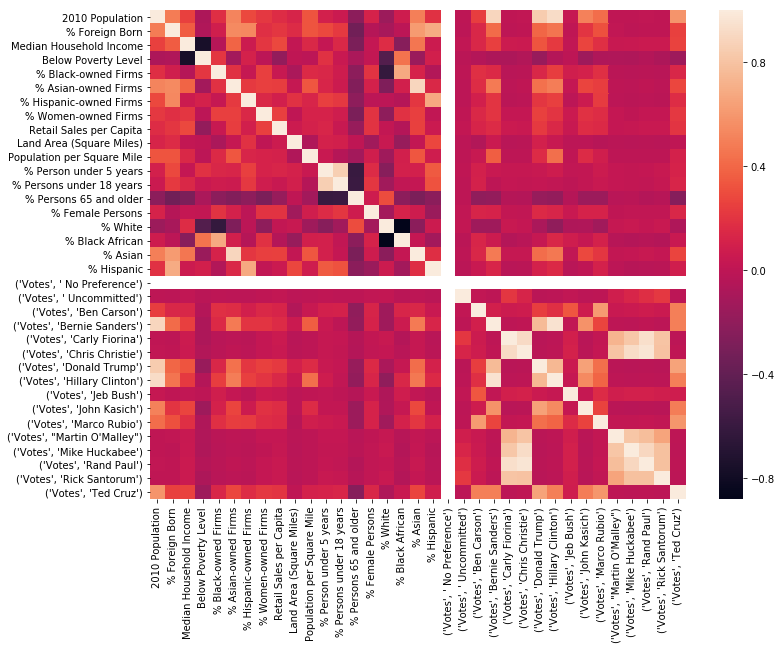

In [24]:
fig, ax=plt.subplots(figsize=(12,9))
seaborn.heatmap(clean.corr(), ax=ax)
plt.savefig('corr-matrix2.png')